# Proyecto

In [122]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [4]:
dataSet = np.load('proyecto_training_data.npy')

In [23]:
dataP = dataSet[:int(len(dataSet)*0.8)]
dataA = dataSet[int(len(dataSet)*0.8):]
print(len(dataSet))
print(len(dataP))
print(len(dataA))
df = pd.DataFrame(dataP, columns = ['X0','X1','X2','X3','X4','X5'])
print(df)

1460
1168
292
            X0   X1      X2   X3      X4    X5
0     208500.0  7.0   856.0  8.0  2003.0  65.0
1     181500.0  6.0  1262.0  6.0  1976.0  80.0
2     223500.0  7.0   920.0  6.0  2001.0  68.0
3     140000.0  7.0   961.0  7.0  1915.0  60.0
4     250000.0  8.0  1145.0  9.0  2000.0  84.0
...        ...  ...     ...  ...     ...   ...
1163  108959.0  4.0  1258.0  6.0  1969.0  60.0
1164  194000.0  5.0  1432.0  5.0  1978.0   NaN
1165  233170.0  7.0  1502.0  7.0  2009.0  79.0
1166  245350.0  8.0  1694.0  7.0  2008.0  64.0
1167  173000.0  6.0   959.0  7.0  2000.0  58.0

[1168 rows x 6 columns]


**Media de cada variable:**

In [45]:
#print(df.iloc[:,[0]])
median = np.mean(df)
print(median[0],median[1],median[2],median[3],median[4],median[5])


180590.27739726027 6.101027397260274 1156.3236301369864 6.4854452054794525 1971.451198630137 69.94698544698545


**Valor máximo**

In [49]:
maximum = np.amax(df)
for i in range (len(maximum)) :
    print(maximum[i])

755000.0
10.0
3228.0
14.0
2010.0
313.0


**Valor mínimo**

In [51]:
minimum = np.amin(df)
p
print(minimum)

X0    34900.0
X1        1.0
X2      334.0
X3        2.0
X4     1875.0
X5       21.0
dtype: float64


**Rangos**  
Reemplazar los valores NAN con "0" de cada columna:

In [54]:
df.fillna(0)
#df['X5'] = df['X5'].replace(np.nan, 0) #no me funciono el otro

,X0,X1,X2,X3,X4,X5
0,208500.0,7.0,856.0,8.0,2003.0,65.0
1,181500.0,6.0,1262.0,6.0,1976.0,80.0
2,223500.0,7.0,920.0,6.0,2001.0,68.0
3,140000.0,7.0,961.0,7.0,1915.0,60.0
4,250000.0,8.0,1145.0,9.0,2000.0,84.0
...,...,...,...,...,...,...
1163,108959.0,4.0,1258.0,6.0,1969.0,60.0
1164,194000.0,5.0,1432.0,5.0,1978.0,0.0
1165,233170.0,7.0,1502.0,7.0,2009.0,79.0
1166,245350.0,8.0,1694.0,7.0,2008.0,64.0


In [94]:
ranges = []
print(df.iloc[:,[0]])
for i in range(len(df.count())):
        ranges.append(np.ptp(df.iloc[:,[i]]))
print(ranges)

            X0
0     208500.0
1     181500.0
2     223500.0
3     140000.0
4     250000.0
...        ...
1163  108959.0
1164  194000.0
1165  233170.0
1166  245350.0
1167  173000.0

[1168 rows x 1 columns]
[720100.0, 9.0, 2894.0, 12.0, 135.0, 313.0]


**Desviacion estandar**

In [96]:
stdDf = np.std(df)
print(stdDf)

X0    78781.951080
X1        1.377435
X2      373.620332
X3        1.608452
X4       29.938882
X5       34.121055
dtype: float64


## **Histograma de Variables**

In [97]:
import seaborn as sns

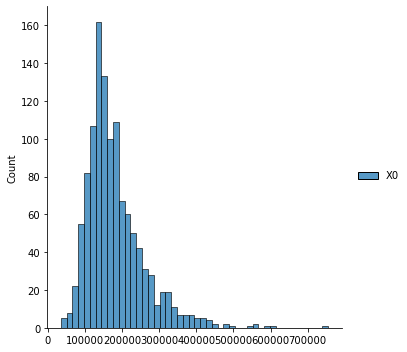

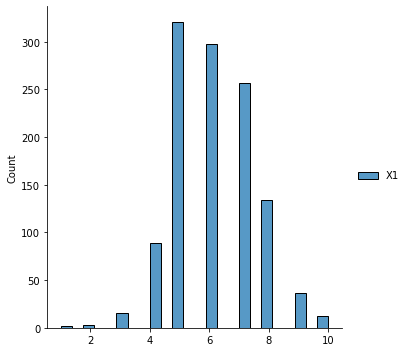

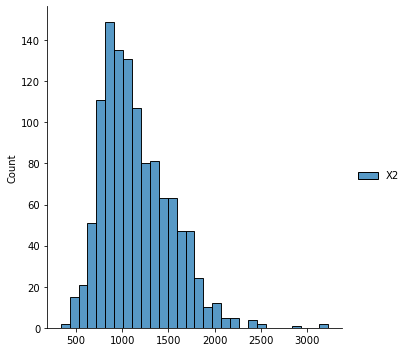

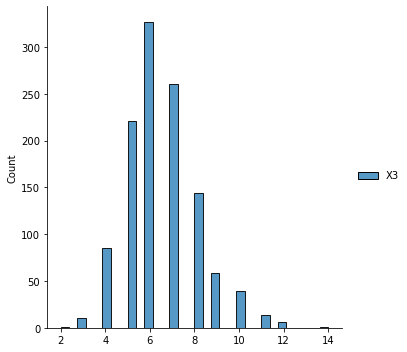

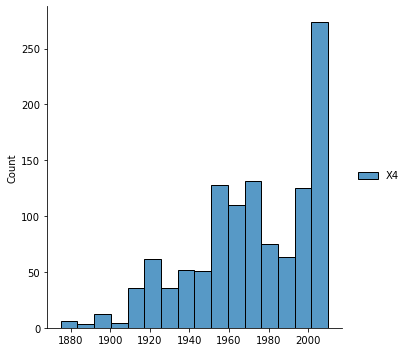

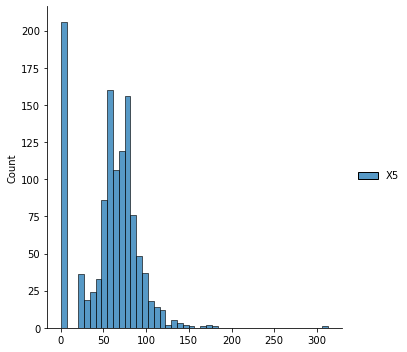

In [107]:
#ax = sns.displot(df.iloc[:,['X0']])
for i in range(len(df.count())):
    ax = sns.displot(df.iloc[:,[i]])

In [108]:
print(df)

            X0   X1      X2   X3      X4    X5
0     208500.0  7.0   856.0  8.0  2003.0  65.0
1     181500.0  6.0  1262.0  6.0  1976.0  80.0
2     223500.0  7.0   920.0  6.0  2001.0  68.0
3     140000.0  7.0   961.0  7.0  1915.0  60.0
4     250000.0  8.0  1145.0  9.0  2000.0  84.0
...        ...  ...     ...  ...     ...   ...
1163  108959.0  4.0  1258.0  6.0  1969.0  60.0
1164  194000.0  5.0  1432.0  5.0  1978.0   0.0
1165  233170.0  7.0  1502.0  7.0  2009.0  79.0
1166  245350.0  8.0  1694.0  7.0  2008.0  64.0
1167  173000.0  6.0   959.0  7.0  2000.0  58.0

[1168 rows x 6 columns]


**Calculo de coeficiente de correlacion entre Xi y Y**

$$r_i = {\frac{\sum(x-\hat{x})(y-\hat{y})}{\sqrt{\sum(x-\hat{x})^2}\sqrt{\sum(y-\hat{y})^2}}} $$

In [178]:
median

x_median = df - median #se resta cada columna por su media Xi - Xmean
x_medianpow2 = np.power((x_median),2)#se eleva cada valor al doble para obtener (Xi-Xmean)^2
y_aux = np.full(x_median.shape,x_median.iloc[:,[0]])#creación de una matriz con los valores de (Yi-Ymean)
x__mean_y__mean = x_median * y_aux#se multiplica (Xi-Xmean) * (Yi-Ymean)
ri = []

Y_Ymean_pow2 =np.sqrt(np.sum(np.array(x_medianpow2.iloc[:,[0]])))#
print(Y_Ymean_pow2)
#print(x_medianpow2)

for i in range(1,6):
    ri.append(float(np.sum(x__mean_y__mean.iloc[:,[i]])/np.sqrt(np.sum(np.array(x_medianpow2.iloc[:,[i]])))*Y_Ymean_pow2))

print(ri[0])
print(type(ri))



2692453.140375173
5755873578525.819
<class 'list'>


In [237]:
#calculando con la funcion COV
def covariance(x,y):
    #print("X",x,"Y",y)
    yc = (y - np.mean(y))
    xc = (x - np.mean(x))
    return np.sum(yc*xc)/len(x)-1

def correlation(x,y):
    cov = round(covariance(x,y),3)
    print("Covariance:",cov)
    return cov / np.std(x)*np.std(y)

corrcoef = []
for i in range(1,6):
      corrcoef.append(round(correlation(np.array(df.iloc[:,[0]]),np.array(df.iloc[:,[i]])),4))
print(corrcoef)


Covariance: 86160.444
Covariance: 18140172.581
Covariance: 71556.949
Covariance: 1259917.255
Covariance: 608072.659
[1.5064, 86029.0612, 1.4609, 478.7964, 263.3608]


<Figure size 432x288 with 0 Axes>

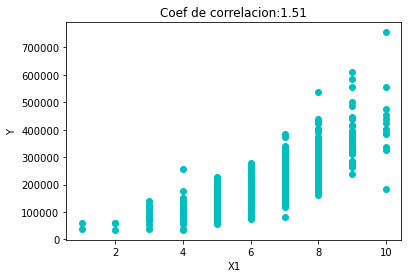

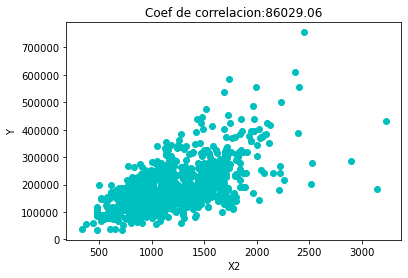

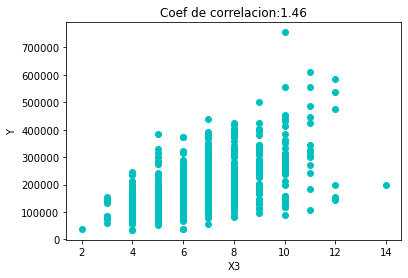

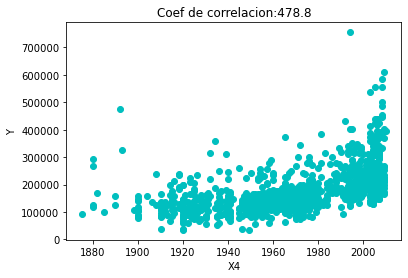

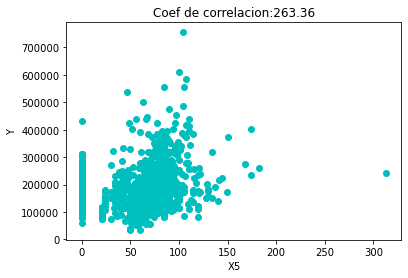

In [239]:
fig = plt.figure()

for i in range(1,6):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.scatter(df.iloc[:,[i]], df.iloc[:,[0]],color="c") 
    ax.set_xlabel('X'+str(i))
    ax.set_ylabel('Y')
    ax.set_title("Coef de correlacion:"+str(round(corrcoef[i-1],2)))
    plt.show()

    

## **Función para entrenar un modelo de regresión lineal de una variable**
\begin{equation*}
\ y = mx + b
\end{equation*}

In [385]:
def regresionLineal(x,y,epochs,impErrCad,lr,params):
    #matriz X
    matX = np.full((len(x),2),1)
    matX[:,0] = x 
    
    #matriz Y
    matY = np.full((len(y),2),1)
    matY[:,0] = y 
    
    #print(matX)
    #print(matY.shape)
    print("Parametros",params)
    
    #vector y_hat
    #y_hat = np.matmul(matX,param) #no funciono
    y_hat = x*params[0]+params[1]
    #error
    error = (np.power((y_hat-y),2))/2
    errorPromedio = np.mean(error)
    
    #gradiente M
    gradienteM = (y_hat - y)*x
    gradPromM = np.mean(gradienteM)#valor promedio del gradiente de M
    
    #gradiente B
    gradienteB = (y_hat - y)*1
    gradPromB = np.mean(gradienteB)#valor promedio del gradiente de B
    
    nuevaM = round(params[0] - lr *gradPromM,6) #nuevo valor de la pendiente M
    nuevaB = round(params[1] - lr *gradPromB,6) #nuevo valor del intercepto B 
    
    #agregar la informacion a un diccionario o lista
    
    
    print("Y_hat",y_hat)
    print("ERROR:",error)
    print("ERROR Promedio:",errorPromedio)
    print("GradienteM:",gradienteM,gradPromM)
    print("GradienteB:",gradienteB,gradPromB)
    
    return nuevaM,nuevaB

In [391]:
errores = []

def funcionLineal(epochs,imprimirErrorCada,lr,m,b):
    
    vecY = df.iloc[:,[0]].values[:,0]
    print("VECTOR Y",vecY)
    for varX in range (1,2) :#recorriendo todas las variables X
        for i in range (epochs):
            params = np.array((m,b))
            vecXi = df.iloc[:,[varX]].values[:,0]
            m,b = regresionLineal(vecXi,vecY,epochs,imprimirErrorCada,lr,params)
            print("********************FIN EPOCHS %s******************"%i)
            #errores.append((i,m,b))

funcionLineal(10,1,0.0001,0,0)                                   


VECTOR Y [208500. 181500. 223500. ... 233170. 245350. 173000.]
Parametros [0 0]
Y_hat [0. 0. 0. ... 0. 0. 0.]
ERROR: [2.17361250e+10 1.64711250e+10 2.49761250e+10 ... 2.71841244e+10
 3.00983112e+10 1.49645000e+10]
ERROR Promedio: 19409722053.22175
GradienteM: [-1459500. -1089000. -1564500. ... -1632190. -1962800. -1038000.] -1187947.67380137
GradienteB: [-208500. -181500. -223500. ... -233170. -245350. -173000.] -180590.27739726027
********************FIN EPOCHS 0******************
Parametros [118.794767  18.059028]
Y_hat [849.622397 730.82763  849.622397 ... 849.622397 968.417164 730.82763 ]
ERROR: [2.15593397e+10 1.63387468e+10 2.47865953e+10 ... 2.69863789e+10
 2.98611790e+10 1.48383339e+10]
ERROR Promedio: 19265628086.53677
GradienteM: [-1453552.643221 -1084615.03422  -1558552.643221 ... -1626242.643221
 -1955052.662688 -1033615.03422 ] -1183190.2601649899
GradienteB: [-207650.377603 -180769.17237  -222650.377603 ... -232320.377603
 -244381.582836 -172269.17237 ] -179847.4482411421

In [392]:
vecX = np.array((65,80,68))
vecY = np.array((208.5,181.5,223.5))
m,b = 0,0

for i in range(3):
    params = np.array((m,b))
    m,b = regresionLineal(vecX,vecY,10,5,0.0001,params)
    print("**************************************")


Parametros [0 0]
Y_hat [0 0 0]
ERROR: [21736.125 16471.125 24976.125]
ERROR Promedio: 21061.125
GradienteM: [-13552.5 -14520.  -15198. ] -14423.5
GradienteB: [-208.5 -181.5 -223.5] -204.5
**************************************
Parametros [1.44235 0.02045]
Y_hat [ 93.7732  115.40845  98.10025]
ERROR: [6581.11931912 2184.0464907  7862.54865003]
ERROR Promedio: 5542.5714866175
GradienteM: [-7457.242 -5287.324 -8527.183] -7090.582999999999
GradienteB: [-114.7268   -66.09155 -125.39975] -102.0727
**************************************
Parametros [2.151408 0.030657]
Y_hat [139.872177 172.143297 146.326401]
ERROR: [2354.88904486   43.77394552 2977.88219131]
ERROR Promedio: 1792.1817272270564
GradienteM: [-4460.808495  -748.53624  -5247.804732] -3485.716489
GradienteB: [-68.627823  -9.356703 -77.173599] -51.71937500000001
**************************************
